In [1]:
from TCs_class_methods import TCs
from aqua.util import load_yaml
import numpy as np
from aqua.logger import log_configure
import pandas as pd
import copy
mainlogger = log_configure('INFO', log_name='MAIN')

Streaming of chunks of data implemented on DetectNodes, then run StitchNodes every period of n_days

In [2]:
# load the config file
tdict = load_yaml('config/config_levante.yml')

2023-05-04 15:16:49 :: TCs :: WARNING  -> Initialised streaming for 5 days starting on 2020-08-01


In [3]:
# initialise tropical class with streaming options
tropical = TCs(tdict=tdict, streaming=True, stream_step=tdict['stream']['streamstep'], stream_unit="days", 
               stream_startdate=tdict['time']['startdate'], loglevel = "WARNING")

# retrieve the data and call detect nodes on the first chunk of data
tropical.data_retrieve()
tropical.detect_nodes_zoomin()

# parameters for stitch nodes (to save tracks of selected variables in netcdf)
n_days_stitch = tdict['stitch']['n_days_freq'] + tdict['stitch']['n_days_ext']
last_run_stitch = pd.Timestamp(tropical.startdate)

# loop to simulate streaming
while len(np.unique(tropical.data2d.time.dt.day)) == tdict['stream']['streamstep']:
    tropical.data_retrieve()
    mainlogger.warning(f"New streaming from {pd.Timestamp(tropical.stream_startdate).strftime('%Y%m%dT%H')} to {pd.Timestamp(tropical.stream_enddate).strftime('%Y%m%dT%H')}")
    timecheck = (tropical.data2d.time.values > np.datetime64(tdict['time']['enddate']))
    
    if timecheck.any():
        tropical.stream_enddate = tropical.data2d.time.values[np.where(timecheck)[0][0]-1] 
        mainlogger.warning(f'Modifying the last stream date {tropical.stream_enddate}') 

    tropical.detect_nodes_zoomin()

    if timecheck.any():
        break
    
    # add one hour since time ends at 23
    dayspassed = (tropical.stream_enddate + np.timedelta64(1, 'h')- last_run_stitch) / np.timedelta64(1, 'D')

    if (dayspassed >= n_days_stitch):
        end_run_stitch = last_run_stitch + np.timedelta64(tdict['stitch']['n_days_freq'], 'D')
        mainlogger.warning(f'Running stitch nodes from {last_run_stitch} to {end_run_stitch}')
        tropical.stitch_nodes_zoomin(startdate=last_run_stitch, enddate=end_run_stitch,
            n_days_freq=tdict['stitch']['n_days_freq'], n_days_ext=tdict['stitch']['n_days_ext'])
        last_run_stitch = copy.deepcopy(end_run_stitch)
# problem: bring the time handling to pandas to avoid mismatch with dates
end_run_stitch = np.datetime64(tdict['time']['enddate'])
mainlogger.warning(f'Running stitch nodes from {last_run_stitch} to {end_run_stitch}')
tropical.stitch_nodes_zoomin(startdate=pd.Timestamp(last_run_stitch), enddate=pd.Timestamp(end_run_stitch),
            n_days_freq=tdict['stitch']['n_days_freq'], n_days_ext=tdict['stitch']['n_days_ext'])
        


2023-05-04 15:17:29 :: TCs :: WARNING  -> Initialised streaming for 5 days starting on 2020-08-01
2023-05-04 15:17:49 :: TCs :: WARNING  -> processing time step 20200801T00
2023-05-04 15:18:03 :: TCs :: WARNING  -> processing time step 20200801T06
2023-05-04 15:18:16 :: TCs :: WARNING  -> processing time step 20200801T12
2023-05-04 15:18:29 :: TCs :: WARNING  -> processing time step 20200801T18
2023-05-04 15:18:43 :: TCs :: WARNING  -> processing time step 20200802T00
2023-05-04 15:18:55 :: TCs :: WARNING  -> processing time step 20200802T06
2023-05-04 15:19:08 :: TCs :: WARNING  -> processing time step 20200802T12
2023-05-04 15:19:21 :: TCs :: WARNING  -> processing time step 20200802T18
2023-05-04 15:19:35 :: TCs :: WARNING  -> processing time step 20200803T00
2023-05-04 15:19:48 :: TCs :: WARNING  -> processing time step 20200803T06
2023-05-04 15:20:01 :: TCs :: WARNING  -> processing time step 20200803T12
2023-05-04 15:20:13 :: TCs :: WARNING  -> processing time step 20200803T18
20

No tracks to write
No tracks to write
No tracks to write
No tracks to write


2023-05-04 15:39:08 :: MAIN :: WARNING  -> New streaming from 20200826T00 to 20200830T23
2023-05-04 15:39:08 :: TCs :: WARNING  -> processing time step 20200826T00
2023-05-04 15:39:21 :: TCs :: WARNING  -> processing time step 20200826T06
2023-05-04 15:39:34 :: TCs :: WARNING  -> processing time step 20200826T12
2023-05-04 15:39:46 :: TCs :: WARNING  -> processing time step 20200826T18
2023-05-04 15:39:58 :: TCs :: WARNING  -> processing time step 20200827T00
2023-05-04 15:40:11 :: TCs :: WARNING  -> processing time step 20200827T06
2023-05-04 15:40:23 :: TCs :: WARNING  -> processing time step 20200827T12
2023-05-04 15:40:35 :: TCs :: WARNING  -> processing time step 20200827T18
2023-05-04 15:40:48 :: TCs :: WARNING  -> processing time step 20200828T00
2023-05-04 15:41:00 :: TCs :: WARNING  -> processing time step 20200828T06
2023-05-04 15:41:12 :: TCs :: WARNING  -> processing time step 20200828T12
2023-05-04 15:41:25 :: TCs :: WARNING  -> processing time step 20200828T18
2023-05-04 

Version without loop on the streaming (streaming is implemented but only to retrieve chunks of data)

Load configuration file with all the tempest options

In [3]:
tdict = load_yaml('config/config_levante.yml')

Initialise the class with the dictionary from the YAML file

In [39]:
tropical = TCs(tdict=tdict, streaming=True, stream_step=tdict['stream']['streamstep'], stream_unit="days", 
               stream_startdate=tdict['time']['startdate'], loglevel = "WARNING")
tropical.data_retrieve()

2023-04-18 16:05:33 :: TCs :: WARNING  -> Initialised streaming for 2 days starting on 2020-08-01


Run the code on a loop on the detect nodes

In [7]:
tropical.detect_nodes_zoomin()

2023-04-18 11:54:37 :: TCs :: WARNING  -> processing time step 20200804T00
2023-04-18 11:54:48 :: TCs :: WARNING  -> processing time step 20200804T06
2023-04-18 11:54:58 :: TCs :: WARNING  -> processing time step 20200804T12
2023-04-18 11:55:08 :: TCs :: WARNING  -> processing time step 20200804T18
2023-04-18 11:55:20 :: TCs :: WARNING  -> processing time step 20200805T00
2023-04-18 11:55:32 :: TCs :: WARNING  -> processing time step 20200805T06
2023-04-18 11:55:43 :: TCs :: WARNING  -> processing time step 20200805T12
2023-04-18 11:55:55 :: TCs :: WARNING  -> processing time step 20200805T18
2023-04-18 11:56:06 :: TCs :: WARNING  -> processing time step 20200806T00
2023-04-18 11:56:18 :: TCs :: WARNING  -> processing time step 20200806T06
2023-04-18 11:56:30 :: TCs :: WARNING  -> processing time step 20200806T12
2023-04-18 11:56:43 :: TCs :: WARNING  -> processing time step 20200806T18


Run the code for the detect nodes, after having set up the days freq and the extensions days

In [5]:
tropical.stitch_nodes_zoomin(start_date=tdict['time']['start_date'], end_date=tdict['time']['end_date'],
                             n_days_freq=tdict['stitch']['n_days_freq'], n_days_ext=tdict['stitch']['n_days_ext'])

2023-04-13 13:57:15 :: TCs :: WARNING  -> running stitch nodes from 2020-08-01 to 2020-09-30
2023-04-13 13:57:19 :: TCs :: WARNING  -> storing stitched tracks for msl
2023-04-13 14:30:48 :: TCs :: WARNING  -> storing stitched tracks for 10u
2023-04-13 14:46:32 :: TCs :: WARNING  -> storing stitched tracks for 10v
2023-04-13 15:00:24 :: TCs :: WARNING  -> storing stitched tracks for tp
2023-04-13 15:15:47 :: TCs :: WARNING  -> running stitch nodes from 2020-08-01 to 2020-09-30
2023-04-13 15:15:55 :: TCs :: WARNING  -> storing stitched tracks for msl


: 

: 

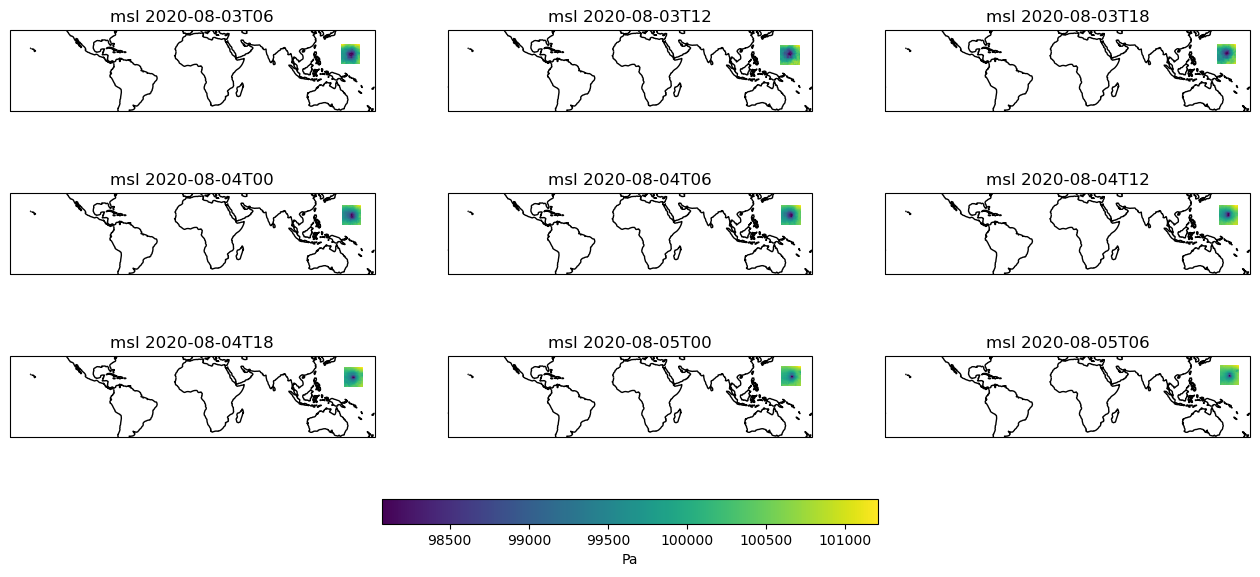

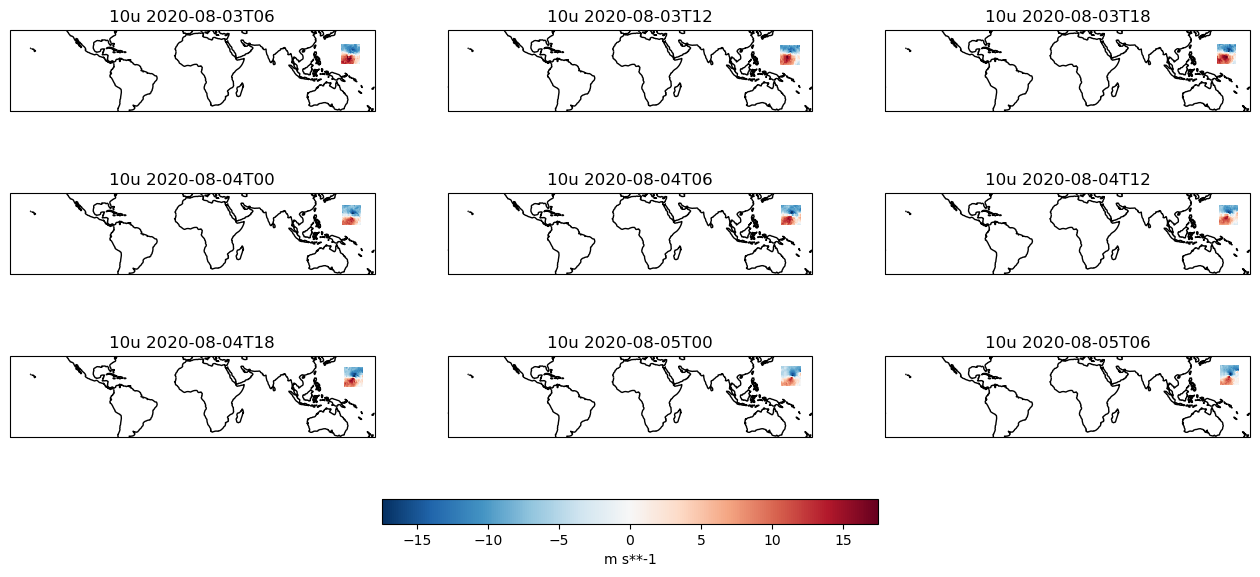

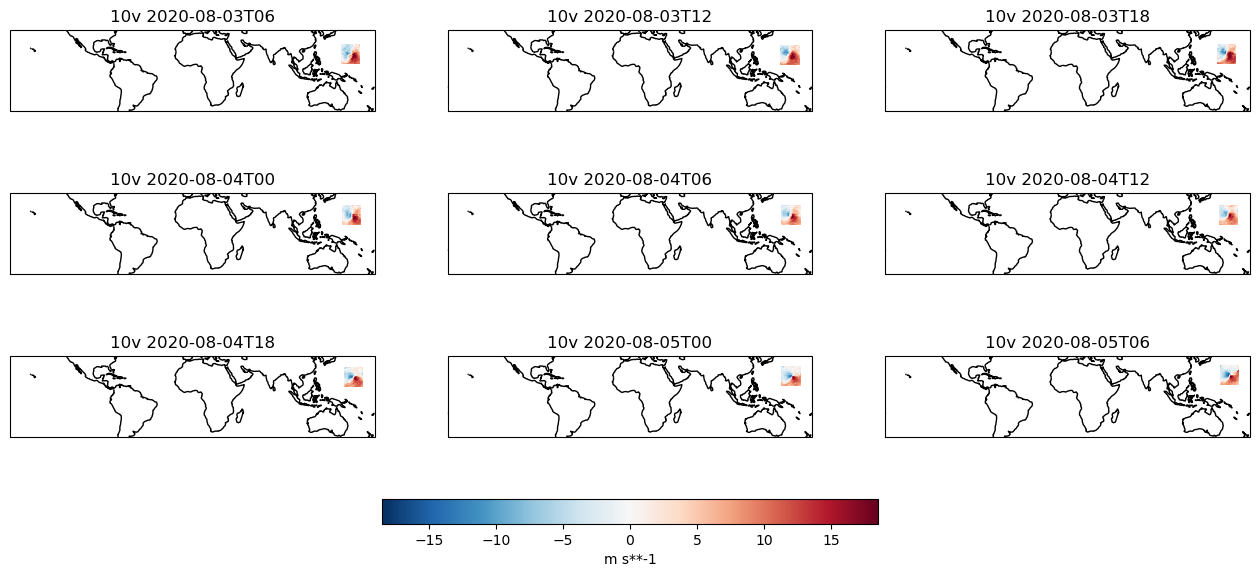

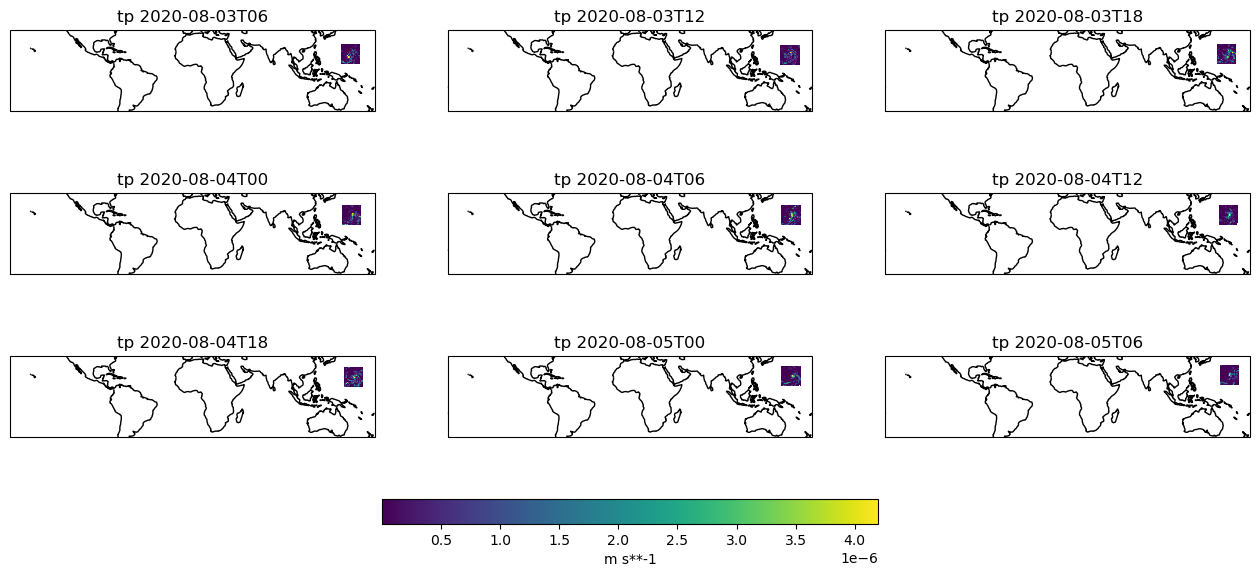

In [12]:
import xarray as xr
import os
from plotting_TCs import multi_plot
# variables to be plotted

for var in tdict['varlist']: 

    tracks_nc_file = os.path.join(tdict['paths']['fulldir'], f"tempest_tracks_{var}_20200801-20200805.nc")
    tracks_nc_file = xr.open_dataset(tracks_nc_file)[var]
    multi_plot(tracks_nc_file)

In [ ]:
# loop on each time stamp in dates
for block in pd.date_range(start=tdict['time']['start_date'], end_date=tdict['time']['end_date'], freq=str(n_days_freq)+'D'):
    dates = pd.date_range(start=block, periods=n_days_freq, freq='D')
    track_file = os.path.join(tdict['paths']['plotting'], f'tempest_track_{block.strftime("%Y%m%d")}-{dates[-1].strftime("%Y%m%d")}.txt')
    plot_trajectories(track_file, tdict['paths']['plotting'], block, dates)